In [1]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam 
import math
from matplotlib import pyplot as plt 
import numpy as np

In [2]:
class ODEsolver(Sequential): 
    def __init__(self, **kwargs): 
        super().__init__(**kwargs) 
        self.loss_tracker = keras.metrics.Mean(name="loss") 
    
    @property 
    def metrics(self):
        return [self.loss_tracker]
    
    def train_step(self, data): 
        
        batch_size = tf.shape(data)[0]
        
        
        x = tf.random.uniform((batch_size, 1), minval = -2, maxval = 2)
        
        
        
        with tf.GradientTape() as tape:
            with tf.GradientTape() as tape2:
                tape2.watch(x)
                y_pred = self(x, training = True) 
            
            dy = tape2.gradient(y_pred, x)
            
            
            #vectores iniciales
            x_o = tf.zeros((batch_size, 1))
            y_o = self(x_o, training = True)

            x_1 = tf.ones((batch_size, 1))
            y_1 = self(x_1, training = True) 

            x_m_1 = -tf.ones((batch_size, 1))
            y_m_1 = self(x_m_1, training = True) 
            #aproximacion de la funcion polinomial 1+2x+4x^3
            eq = y_pred-1.-2.*x-4.*x**3
            
            #condiciones iniciales
            ic = y_o -1.
            ic_1 = y_1 - 7.
            ic_m_1 = y_m_1 +5.
            
            #funcion de costo
            loss = keras.losses.mean_squared_error(0., eq) + keras.losses.mean_squared_error(0., ic) + keras.losses.mean_squared_error(0., ic_1) + keras.losses.mean_squared_error(0., ic_m_1)
    
  
        grads =tape.gradient(loss, self.trainable_variables)
    
    #buscando el minimo 
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
    
    #historial de la funcion de costo 
        self.loss_tracker.update_state(loss)
    
    #imprime el historial 
        return  {"loss": self.loss_tracker.result()}
    
    
    

    

In [3]:

model = ODEsolver()

model.add(Dense(10, activation = "tanh", input_shape = (1, ) ))
model.add(Dense(10, activation = "tanh"))
model.add(Dense(1, activation ="linear"))


model.summary()
model.compile(optimizer = RMSprop(), metrics = ['loss'])
    
    
x = tf.linspace(-1, 1, 100) 
history = model.fit(x, epochs = 1000, verbose =1) 

#dominio 
x_testv = tf.linspace(-1, 1, 100)

a = model.predict(x_testv) 
    

Model: "od_esolver"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


2022-10-20 21:46:59.244837: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/1000
4/4 [==============================] - 4s 8ms/step - loss: 286.2433
Epoch 2/1000
4/4 [==============================] - 0s 7ms/step - loss: 293.2314
Epoch 3/1000
4/4 [==============================] - 0s 13ms/step - loss: 295.7387
Epoch 4/1000
4/4 [==============================] - 0s 4ms/step - loss: 270.4054
Epoch 5/1000
4/4 [==============================] - 0s 4ms/step - loss: 292.0450
Epoch 6/1000
4/4 [==============================] - 0s 4ms/step - loss: 208.5880
Epoch 7/1000
4/4 [==============================] - 0s 4ms/step - loss: 259.3489
Epoch 8/1000
4/4 [==============================] - 0s 4ms/step - loss: 250.7389
Epoch 9/1000
4/4 [==============================] - 0s 5ms/step - loss: 288.2507
Epoch 10/1000
4/4 [==============================] - 0s 5ms/step - loss: 284.9057
Epoch 11/1000
4/4 [==============================] - 0s 5ms/step - loss: 226.5860
Epoch 12/1000
4/4 [==============================] - 0s 6ms/step - loss: 268.7647
Epoch 13/1000
4/4 [=====

4/4 [==============================] - 0s 4ms/step - loss: 104.5933
Epoch 102/1000
4/4 [==============================] - 0s 4ms/step - loss: 104.7611
Epoch 103/1000
4/4 [==============================] - 0s 5ms/step - loss: 132.4222
Epoch 104/1000
4/4 [==============================] - 0s 8ms/step - loss: 103.8814
Epoch 105/1000
4/4 [==============================] - 0s 5ms/step - loss: 124.2846
Epoch 106/1000
4/4 [==============================] - 0s 6ms/step - loss: 111.4317
Epoch 107/1000
4/4 [==============================] - 0s 7ms/step - loss: 114.0439
Epoch 108/1000
4/4 [==============================] - 0s 7ms/step - loss: 101.3531
Epoch 109/1000
4/4 [==============================] - 0s 5ms/step - loss: 105.6084
Epoch 110/1000
4/4 [==============================] - 0s 5ms/step - loss: 82.5788
Epoch 111/1000
4/4 [==============================] - 0s 4ms/step - loss: 82.7771
Epoch 112/1000
4/4 [==============================] - 0s 5ms/step - loss: 117.7757
Epoch 113/1000
4/4 [=

4/4 [==============================] - 0s 6ms/step - loss: 64.2068
Epoch 201/1000
4/4 [==============================] - 0s 7ms/step - loss: 120.9533
Epoch 202/1000
4/4 [==============================] - 0s 6ms/step - loss: 88.3444
Epoch 203/1000
4/4 [==============================] - 0s 8ms/step - loss: 93.5176
Epoch 204/1000
4/4 [==============================] - 0s 5ms/step - loss: 100.8117
Epoch 205/1000
4/4 [==============================] - 0s 6ms/step - loss: 70.9733
Epoch 206/1000
4/4 [==============================] - 0s 5ms/step - loss: 98.5420
Epoch 207/1000
4/4 [==============================] - 0s 4ms/step - loss: 84.3049
Epoch 208/1000
4/4 [==============================] - 0s 28ms/step - loss: 76.1181
Epoch 209/1000
4/4 [==============================] - 0s 6ms/step - loss: 72.3312
Epoch 210/1000
4/4 [==============================] - 0s 6ms/step - loss: 66.1695
Epoch 211/1000
4/4 [==============================] - 0s 6ms/step - loss: 97.9535
Epoch 212/1000
4/4 [========

Epoch 300/1000
4/4 [==============================] - 0s 4ms/step - loss: 37.0284
Epoch 301/1000
4/4 [==============================] - 0s 6ms/step - loss: 63.4605
Epoch 302/1000
4/4 [==============================] - 0s 5ms/step - loss: 67.6005
Epoch 303/1000
4/4 [==============================] - 0s 5ms/step - loss: 83.0608
Epoch 304/1000
4/4 [==============================] - 0s 5ms/step - loss: 83.4874
Epoch 305/1000
4/4 [==============================] - 0s 6ms/step - loss: 43.4464
Epoch 306/1000
4/4 [==============================] - 0s 8ms/step - loss: 85.9018
Epoch 307/1000
4/4 [==============================] - 0s 4ms/step - loss: 39.0371
Epoch 308/1000
4/4 [==============================] - 0s 4ms/step - loss: 60.9645
Epoch 309/1000
4/4 [==============================] - 0s 4ms/step - loss: 68.4731
Epoch 310/1000
4/4 [==============================] - 0s 6ms/step - loss: 62.3736
Epoch 311/1000
4/4 [==============================] - 0s 3ms/step - loss: 53.3453
Epoch 312/1000
4

4/4 [==============================] - 0s 3ms/step - loss: 40.0283
Epoch 400/1000
4/4 [==============================] - 0s 3ms/step - loss: 42.3544
Epoch 401/1000
4/4 [==============================] - 0s 3ms/step - loss: 31.0229
Epoch 402/1000
4/4 [==============================] - 0s 4ms/step - loss: 28.1863
Epoch 403/1000
4/4 [==============================] - 0s 3ms/step - loss: 45.0485
Epoch 404/1000
4/4 [==============================] - 0s 3ms/step - loss: 43.3866
Epoch 405/1000
4/4 [==============================] - 0s 3ms/step - loss: 20.8193
Epoch 406/1000
4/4 [==============================] - 0s 3ms/step - loss: 23.5673
Epoch 407/1000
4/4 [==============================] - 0s 4ms/step - loss: 34.6874
Epoch 408/1000
4/4 [==============================] - 0s 3ms/step - loss: 35.7309
Epoch 409/1000
4/4 [==============================] - 0s 3ms/step - loss: 32.8113
Epoch 410/1000
4/4 [==============================] - 0s 3ms/step - loss: 23.2396
Epoch 411/1000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 19.6966
Epoch 500/1000
4/4 [==============================] - 0s 3ms/step - loss: 13.4681
Epoch 501/1000
4/4 [==============================] - 0s 3ms/step - loss: 23.3965
Epoch 502/1000
4/4 [==============================] - 0s 3ms/step - loss: 21.2573
Epoch 503/1000
4/4 [==============================] - 0s 3ms/step - loss: 29.3170
Epoch 504/1000
4/4 [==============================] - 0s 3ms/step - loss: 16.5427
Epoch 505/1000
4/4 [==============================] - 0s 3ms/step - loss: 18.6076
Epoch 506/1000
4/4 [==============================] - 0s 3ms/step - loss: 25.7884
Epoch 507/1000
4/4 [==============================] - 0s 3ms/step - loss: 33.7551
Epoch 508/1000
4/4 [==============================] - 0s 3ms/step - loss: 22.2175
Epoch 509/1000
4/4 [==============================] - 0s 3ms/step - loss: 24.0765
Epoch 510/1000
4/4 [==============================] - 0s 3ms/step - loss: 19.7310
Epoch 511/1000
4/4 [===========

4/4 [==============================] - 0s 5ms/step - loss: 8.5381
Epoch 600/1000
4/4 [==============================] - 0s 4ms/step - loss: 13.3756
Epoch 601/1000
4/4 [==============================] - 0s 3ms/step - loss: 16.6997
Epoch 602/1000
4/4 [==============================] - 0s 5ms/step - loss: 15.9777
Epoch 603/1000
4/4 [==============================] - 0s 4ms/step - loss: 12.9192
Epoch 604/1000
4/4 [==============================] - 0s 5ms/step - loss: 10.4597
Epoch 605/1000
4/4 [==============================] - 0s 7ms/step - loss: 2.7206
Epoch 606/1000
4/4 [==============================] - 0s 3ms/step - loss: 13.0052
Epoch 607/1000
4/4 [==============================] - 0s 4ms/step - loss: 10.7128
Epoch 608/1000
4/4 [==============================] - 0s 3ms/step - loss: 9.4530
Epoch 609/1000
4/4 [==============================] - 0s 4ms/step - loss: 11.2310
Epoch 610/1000
4/4 [==============================] - 0s 3ms/step - loss: 11.5136
Epoch 611/1000
4/4 [==============

4/4 [==============================] - 0s 5ms/step - loss: 3.3180
Epoch 700/1000
4/4 [==============================] - 0s 4ms/step - loss: 2.4270
Epoch 701/1000
4/4 [==============================] - 0s 6ms/step - loss: 6.6101
Epoch 702/1000
4/4 [==============================] - 0s 5ms/step - loss: 5.2816
Epoch 703/1000
4/4 [==============================] - 0s 5ms/step - loss: 5.8829
Epoch 704/1000
4/4 [==============================] - 0s 4ms/step - loss: 6.1636
Epoch 705/1000
4/4 [==============================] - 0s 4ms/step - loss: 2.4091
Epoch 706/1000
4/4 [==============================] - 0s 4ms/step - loss: 2.6245
Epoch 707/1000
4/4 [==============================] - 0s 4ms/step - loss: 6.1324
Epoch 708/1000
4/4 [==============================] - 0s 4ms/step - loss: 4.3554
Epoch 709/1000
4/4 [==============================] - 0s 5ms/step - loss: 2.8494
Epoch 710/1000
4/4 [==============================] - 0s 4ms/step - loss: 6.0504
Epoch 711/1000
4/4 [=======================

4/4 [==============================] - 0s 3ms/step - loss: 3.4712
Epoch 801/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.4017
Epoch 802/1000
4/4 [==============================] - 0s 4ms/step - loss: 1.5470
Epoch 803/1000
4/4 [==============================] - 0s 6ms/step - loss: 4.4693
Epoch 804/1000
4/4 [==============================] - 0s 4ms/step - loss: 2.4958
Epoch 805/1000
4/4 [==============================] - 0s 6ms/step - loss: 3.2424
Epoch 806/1000
4/4 [==============================] - 0s 5ms/step - loss: 3.6263
Epoch 807/1000
4/4 [==============================] - 0s 3ms/step - loss: 2.0749
Epoch 808/1000
4/4 [==============================] - 0s 4ms/step - loss: 1.8306
Epoch 809/1000
4/4 [==============================] - 0s 4ms/step - loss: 4.8779
Epoch 810/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.9016
Epoch 811/1000
4/4 [==============================] - 0s 4ms/step - loss: 2.2882
Epoch 812/1000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.2389
Epoch 902/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.6655
Epoch 903/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.3267
Epoch 904/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.6141
Epoch 905/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7645
Epoch 906/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.7239
Epoch 907/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.0307
Epoch 908/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.4678
Epoch 909/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.2876
Epoch 910/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5092
Epoch 911/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.0930
Epoch 912/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.8196
Epoch 913/1000
4/4 [=======================

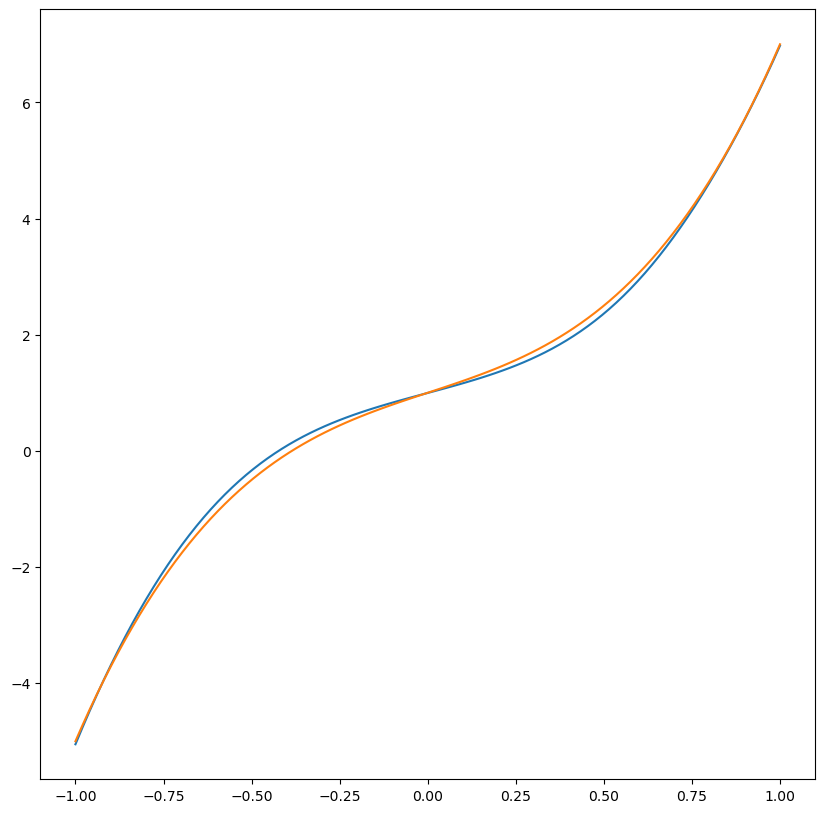

In [4]:
plt.figure(figsize = (10,10))
plt.plot(x_testv, a)
plt.plot(x_testv, 1.+2.*x+4.*x**3) 
plt.show()